In [1]:
## Import Libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# Load the dataset
df = pd.read_csv('data/ecommerce_customer_behavior_dataset.csv')

In [3]:
# Display basic information
print("Dataset Shape (Rows, Cols):", df.shape)
df.head()

Dataset Shape (Rows, Cols): (5000, 18)


,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
0,ORD_001337,CUST_01337,2023-01-01,27,Female,Bursa,Toys,54.28,1,0.00,54.28,Debit Card,Mobile,4,14,True,8,5
1,ORD_004885,CUST_04885,2023-01-01,42,Male,Konya,Toys,244.90,1,0.00,244.90,Credit Card,Mobile,11,3,True,3,3
2,ORD_004507,CUST_04507,2023-01-01,43,Female,Ankara,Food,48.15,5,0.00,240.75,Credit Card,Mobile,7,8,True,5,2
3,ORD_000645,CUST_00645,2023-01-01,32,Male,Istanbul,Electronics,804.06,1,229.28,574.78,Credit Card,Mobile,8,10,False,1,4
4,ORD_000690,CUST_00690,2023-01-01,40,Female,Istanbul,Sports,755.61,5,0.00,3778.05,Cash on Delivery,Desktop,21,10,True,7,4


In [4]:
# Convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Order_ID                  5000 non-null   object        
 1   Customer_ID               5000 non-null   object        
 2   Date                      5000 non-null   datetime64[ns]
 3   Age                       5000 non-null   int64         
 4   Gender                    5000 non-null   object        
 5   City                      5000 non-null   object        
 6   Product_Category          5000 non-null   object        
 7   Unit_Price                5000 non-null   float64       
 8   Quantity                  5000 non-null   int64         
 9   Discount_Amount           5000 non-null   float64       
 10  Total_Amount              5000 non-null   float64       
 11  Payment_Method            5000 non-null   object        
 12 

In [6]:
print("Missing Values:")
# Sum of all null values in each column
print(df.isnull().sum())

Missing Values:
Order_ID                    0
Customer_ID                 0
Date                        0
Age                         0
Gender                      0
City                        0
Product_Category            0
Unit_Price                  0
Quantity                    0
Discount_Amount             0
Total_Amount                0
Payment_Method              0
Device_Type                 0
Session_Duration_Minutes    0
Pages_Viewed                0
Is_Returning_Customer       0
Delivery_Time_Days          0
Customer_Rating             0
dtype: int64


In [7]:
print("Duplicated Rows:")
print(df.duplicated().sum())

Duplicated Rows:
0


In [8]:
print("Statistical Summary:")
df.describe().round(2)

Statistical Summary:


,Date,Age,Unit_Price,Quantity,Discount_Amount,Total_Amount,Session_Duration_Minutes,Pages_Viewed,Delivery_Time_Days,Customer_Rating
count,5000,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,2023-08-16 09:16:24.959999744,35.03,455.83,2.22,24.85,983.11,14.57,8.98,6.50,3.90
min,2023-01-01 00:00:00,18.00,5.18,1.00,0.00,7.87,1.00,1.00,1.00,1.00
25%,2023-04-30 00:00:00,27.00,76.59,1.00,0.00,122.52,8.00,7.00,4.00,3.00
50%,2023-08-17 00:00:00,35.00,182.95,2.00,0.00,337.91,13.00,9.00,6.00,4.00
75%,2023-12-06 00:00:00,42.00,513.93,3.00,8.76,979.70,19.00,11.00,8.00,5.00
max,2024-03-26 00:00:00,75.00,7159.45,5.00,1525.55,22023.90,73.00,24.00,25.00,5.00
std,NaN,11.08,712.48,1.40,88.39,1898.98,8.67,2.80,3.46,1.13


In [9]:
df['Session_Duration_Minutes'].sort_values(ascending=False).head()
#df.iloc[379]
#df[['Unit_Price', 'Product_Category']].sort_values(by='Unit_Price', ascending=False).head()

421     73
3870    64
1000    57
4378    55
3517    55
Name: Session_Duration_Minutes, dtype: int64

## Customer Demographics

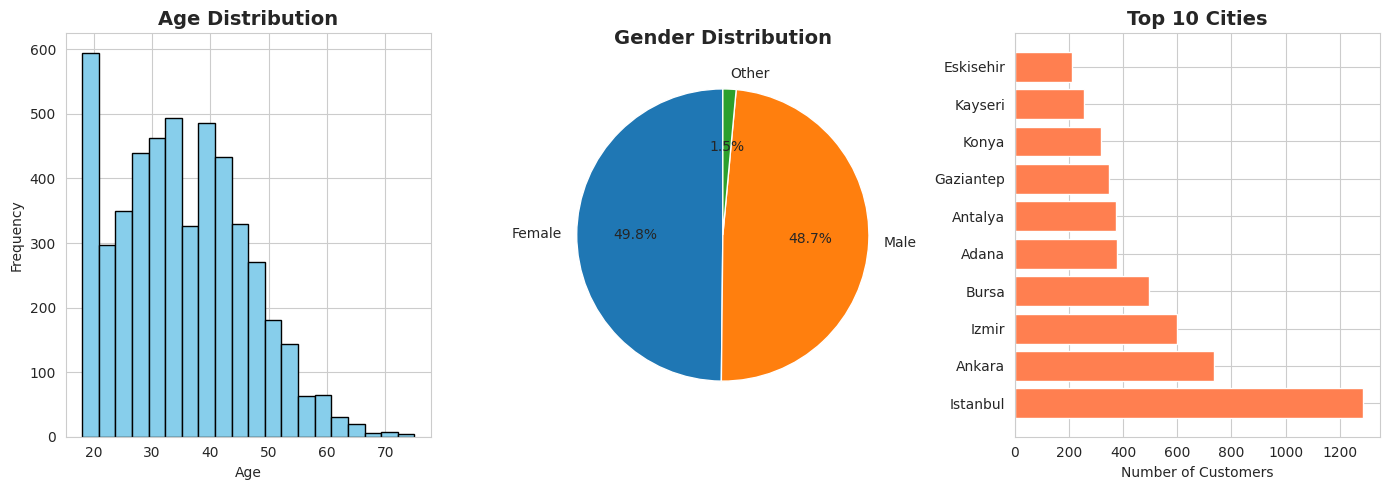

In [10]:
### Age Distribution

# Set plot size to 14 inches wide by 5 high.
plt.figure(figsize=(14, 5))
# Set subplot position: 1st plot in a 1x3 grid.
plt.subplot(1, 3, 1)
# Plot histogram of 'Age' (20 bins, skyblue color).
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Frequency')

### Gender Distribution

plt.subplot(1, 3, 2)
gender_counts = df['Gender'].value_counts()
# Draw the pie chart, label slices, and display percentages.
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
# Add a bold title to the plot.
plt.title('Gender Distribution', fontsize=14, fontweight='bold')

### City Distribution

plt.subplot(1, 3, 3)
city_counts = df['City'].value_counts().head(10)
# Plot horizontal bar chart using counts and city names.
plt.barh(city_counts.index, city_counts.values, color='coral')
plt.title('Top 10 Cities', fontsize=14, fontweight='bold')
plt.xlabel('Number of Customers')

plt.tight_layout()
plt.show()

## Product Analysis

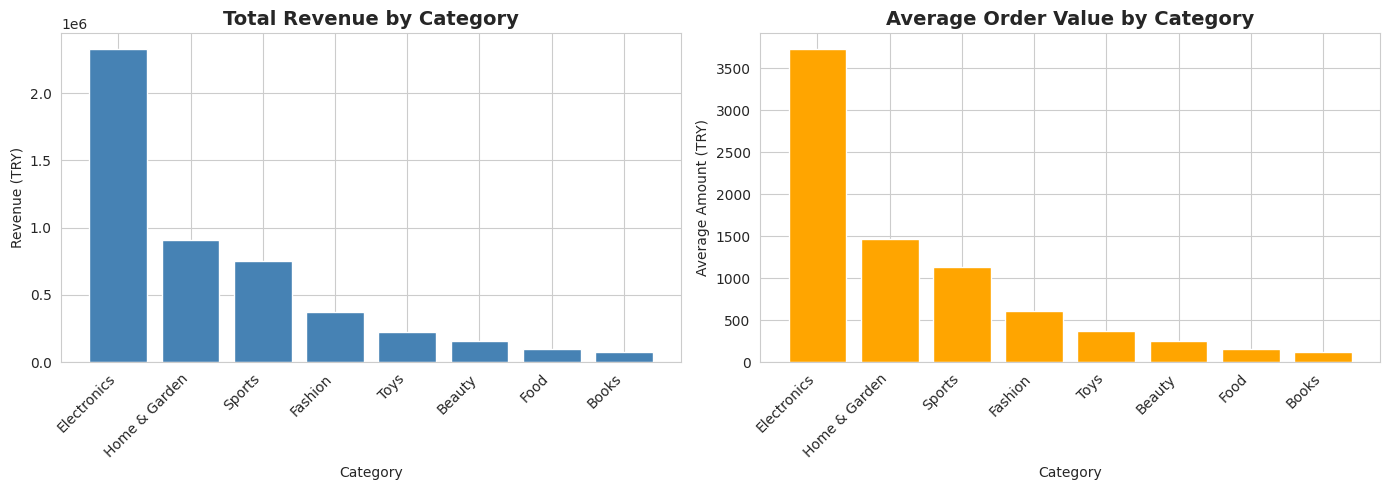

In [11]:
plt.figure(figsize=(14, 5))

### Group total revenue by category.

plt.subplot(1, 2, 1)
category_revenue = df.groupby('Product_Category')['Total_Amount'].sum().sort_values(ascending=False)
# Set X, Y and bar color.
plt.bar(category_revenue.index, category_revenue.values, color='steelblue')
plt.title('Total Revenue by Category', fontsize=14, fontweight='bold')
plt.xlabel('Category')
plt.ylabel('Revenue (TRY)')
plt.xticks(rotation=45, ha='right')

### Average Order Value by Category

plt.subplot(1, 2, 2)
avg_order = df.groupby('Product_Category')['Total_Amount'].mean().sort_values(ascending=False)
plt.bar(avg_order.index, avg_order.values, color='orange')
plt.title('Average Order Value by Category', fontsize=14, fontweight='bold')
plt.xlabel('Category')
plt.ylabel('Average Amount (TRY)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Product Category Performance

In [12]:
# Group by Product_Category and calculate multiple aggregations
category_stats = df.groupby('Product_Category').agg({
    'Total_Amount': ['sum', 'mean', 'count'],
    'Customer_Rating': 'mean',
    'Quantity': 'sum'
}).round(2)
#category_stats
# FLATTENS multi-level columns - renames inner level only (loses original column names)
category_stats.columns = ['Total_Revenue', 'Avg_Order_Value', 'Orders', 'Avg_Rating', 'Total_Units']
# Sorts by Total_Revenue descending (highest first)
category_stats = category_stats.sort_values('Total_Revenue', ascending=False)
print("Category Performance Summary:")
category_stats

Category Performance Summary:


,Total_Revenue,Avg_Order_Value,Orders,Avg_Rating,Total_Units
Product_Category,,,,,
Electronics,2328806.81,3732.06,624,3.92,1379
Home & Garden,908348.86,1462.72,621,3.94,1353
Sports,754563.56,1131.28,667,3.90,1519
Fashion,375214.93,603.24,622,3.88,1411
Toys,223142.48,365.81,610,3.88,1368
Beauty,156584.74,252.15,621,3.91,1424
Food,96138.67,155.31,619,3.83,1355
Books,72744.52,118.09,616,3.97,1291


## Payment & Device Analysis

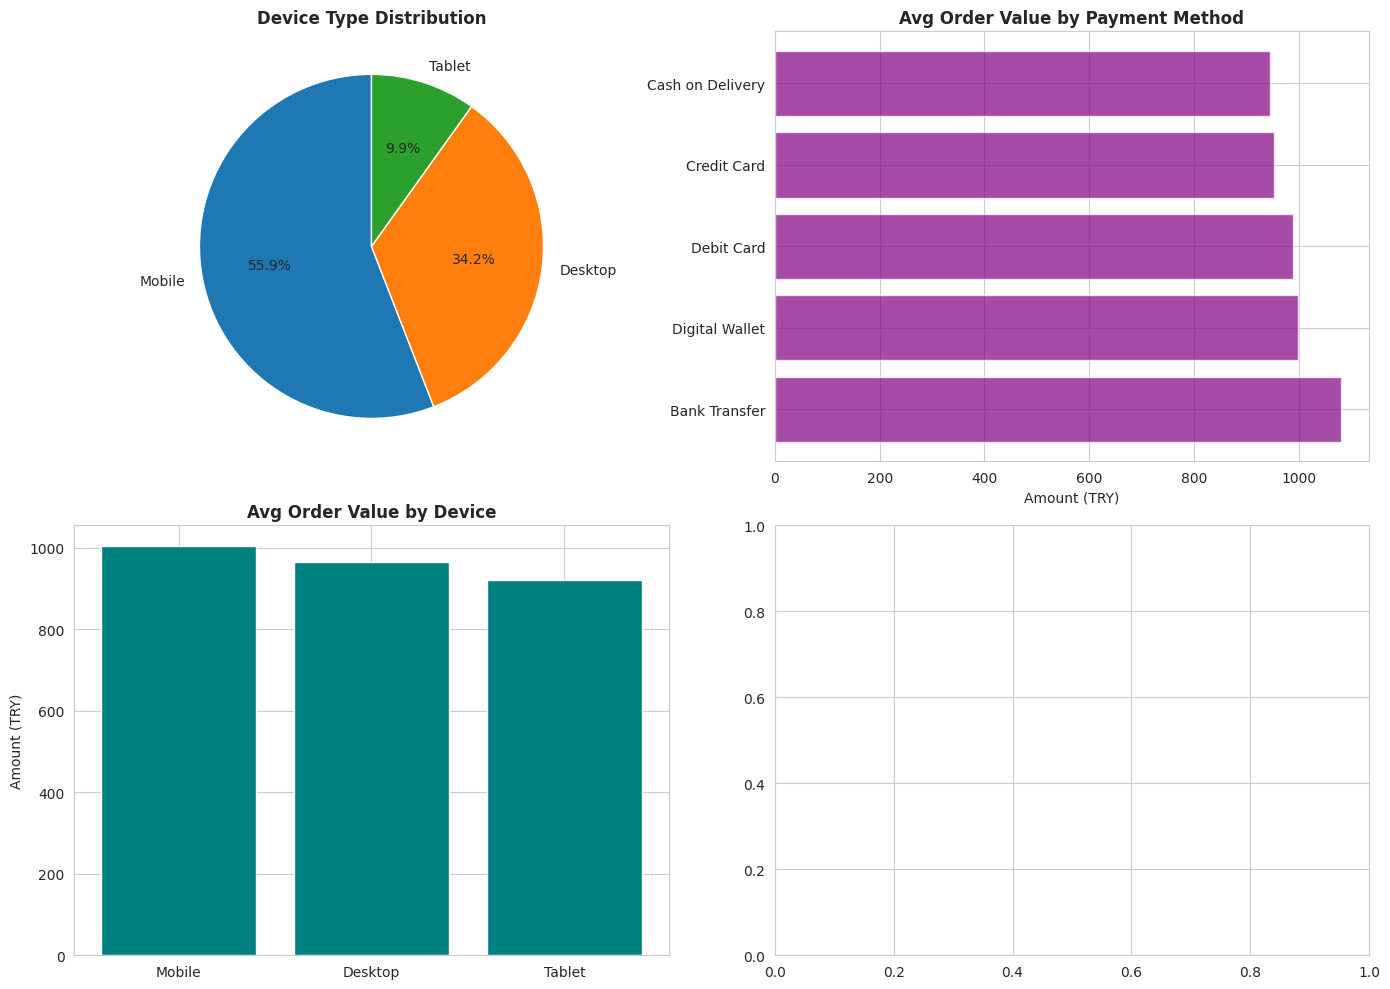

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
### Device Type

device_counts = df['Device_Type'].value_counts()
axes[0, 0].pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Device Type Distribution', fontsize=12, fontweight='bold')

### Average Order Value by Payment Method

avg_by_payment = df.groupby('Payment_Method')['Total_Amount'].mean().sort_values(ascending=False)
axes[0, 1].barh(avg_by_payment.index, avg_by_payment.values, color='purple', alpha=0.7)
axes[0, 1].set_title('Avg Order Value by Payment Method', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Amount (TRY)')

### Average Order Value by Device

avg_by_device = df.groupby('Device_Type')['Total_Amount'].mean().sort_values(ascending=False)
axes[1, 0].bar(avg_by_device.index, avg_by_device.values, color='teal')
axes[1, 0].set_title('Avg Order Value by Device', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Amount (TRY)')

plt.tight_layout()
plt.show()

## Customer Satisfaction

Product_Category
Books            3.967532
Home & Garden    3.938808
Electronics      3.919872
Beauty           3.908213
Sports           3.898051
Toys             3.883607
Fashion          3.876206
Food             3.830372
Name: Customer_Rating, dtype: float64


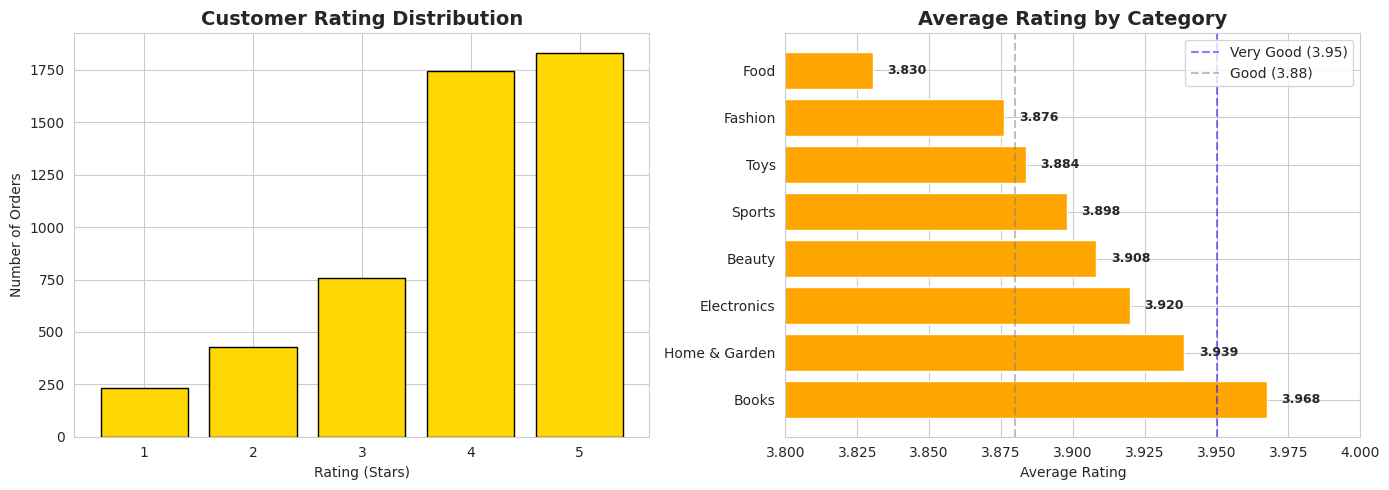

In [14]:
### Rating Distribution

plt.figure(figsize=(14, 5))
# Create first subplot in 1x2 grid
plt.subplot(1, 2, 1)
# Count ratings and sort by star value
rating_counts = df['Customer_Rating'].value_counts().sort_index()

# Create bar chart
plt.bar(rating_counts.index, rating_counts.values, color='gold', edgecolor='black')
plt.title('Customer Rating Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Rating (Stars)')
plt.ylabel('Number of Orders')
plt.xticks([1, 2, 3, 4, 5])

### Average Rating by Category

plt.subplot(1, 2, 2)
# Calculate average rating per category, sorted highest to lowest.
avg_rating = df.groupby('Product_Category')['Customer_Rating'].mean().sort_values(ascending=False)
print(avg_rating)
# Create color list: green for ratings >=4, orange for >=3, red for lower.
colors = ['green' if x >= 4 else 'orange' if x >= 3 else 'red' for x in avg_rating.values]
bars = plt.barh(avg_rating.index, avg_rating.values, color=colors)

# Add value labels on each bar with exact values
for bar, value in zip(bars, avg_rating.values):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2, 
            f'{value:.3f}', va='center', fontsize=9, fontweight='bold')

# Zoom in to show the small differences clearly
plt.xlim(3.80, 4.00)

plt.title('Average Rating by Category', fontsize=14, fontweight='bold')
plt.xlabel('Average Rating')
# Add vertical reference line at rating 4.0
plt.axvline(x=3.95, color='blue', linestyle='--', alpha=0.5, label='Very Good (3.95)')
plt.axvline(x=3.88, color='gray', linestyle='--', alpha=0.5, label='Good (3.88)')
plt.legend()

plt.tight_layout()
plt.show()

## Time Series Analysis

In [15]:

# Monthly trends
df['Year_Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Year_Month').agg({
    'Total_Amount': 'sum',
    'Order_ID': 'count'
}).reset_index()
monthly_sales['Year_Month'] = monthly_sales['Year_Month'].astype(str)


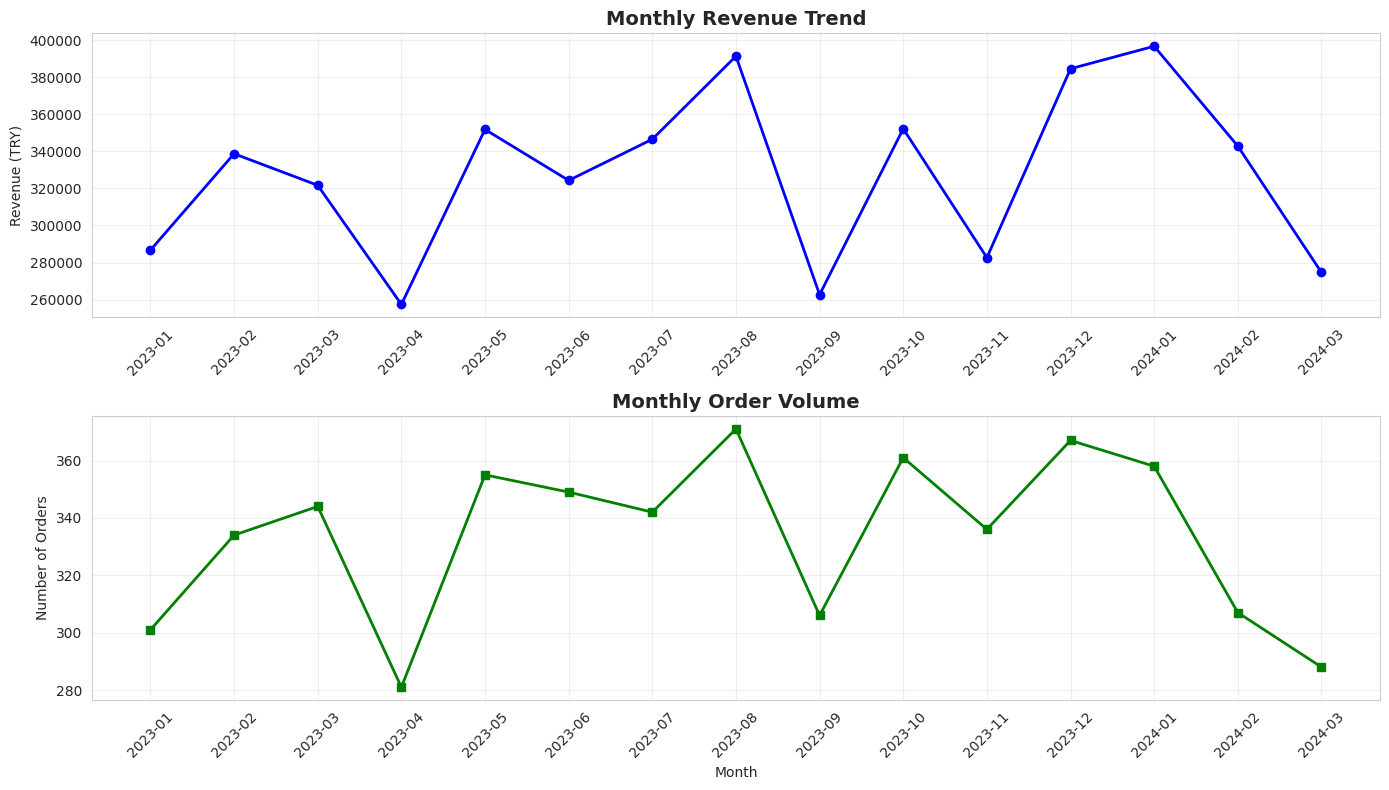

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Revenue over time
axes[0].plot(monthly_sales['Year_Month'], monthly_sales['Total_Amount'], 
             marker='o', linewidth=2, color='blue')
axes[0].set_title('Monthly Revenue Trend', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Revenue (TRY)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

# Orders over time
axes[1].plot(monthly_sales['Year_Month'], monthly_sales['Order_ID'], 
             marker='s', linewidth=2, color='green')
axes[1].set_title('Monthly Order Volume', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of Orders')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
#plt.savefig('monthly_revenue_and_order.png', dpi=300)
plt.show()

## Customer Loyalty

### Returning vs New Customers

In [17]:
customer_type_stats = df.groupby('Is_Returning_Customer').agg({
    'Total_Amount': ['sum', 'mean', 'count'],
    'Customer_Rating': 'mean'
}).round(2)

print("Returning vs New Customer Analysis:")
print(customer_type_stats)

Returning vs New Customer Analysis:
                      Total_Amount               Customer_Rating
                               sum    mean count            mean
Is_Returning_Customer                                           
False                   1967523.73  978.87  2010            3.91
True                    2948020.84  985.96  2990            3.90


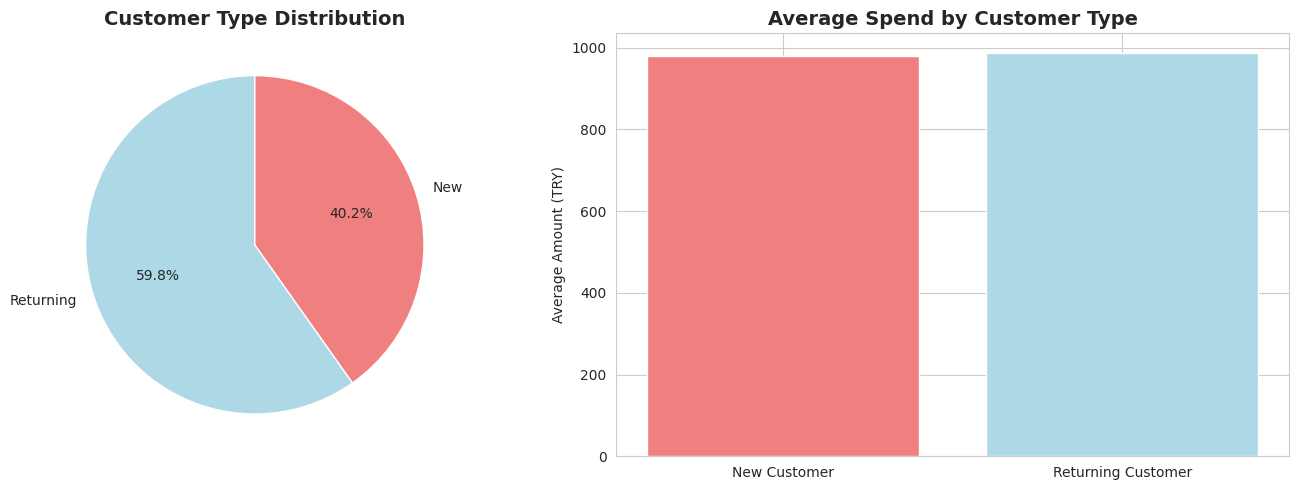

In [18]:
plt.figure(figsize=(14, 5))

### Customer Type Distribution

plt.subplot(1, 2, 1)
returning = df['Is_Returning_Customer'].value_counts()
plt.pie(returning, labels=['Returning', 'New'], autopct='%1.1f%%', 
        colors=['lightblue', 'lightcoral'], startangle=90)
plt.title('Customer Type Distribution', fontsize=14, fontweight='bold')

### Average Spend by Customer Type

plt.subplot(1, 2, 2)
avg_spend = df.groupby('Is_Returning_Customer')['Total_Amount'].mean()
plt.bar(['New Customer', 'Returning Customer'], avg_spend.values, color=['lightcoral', 'lightblue'])
plt.title('Average Spend by Customer Type', fontsize=14, fontweight='bold')
plt.ylabel('Average Amount (TRY)')

plt.tight_layout()
plt.show()

## Delivery Performance

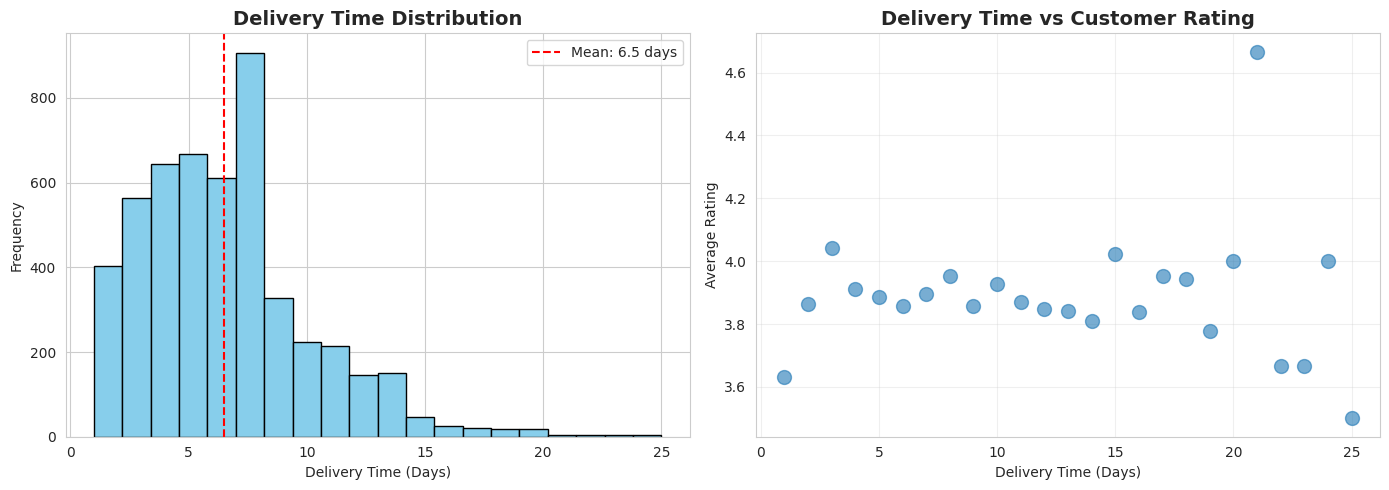

In [19]:
plt.figure(figsize=(14, 5))

### Delivery Time Distribution

plt.subplot(1, 2, 1)
plt.hist(df['Delivery_Time_Days'], bins=20, color='skyblue', edgecolor='black')
plt.title('Delivery Time Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Delivery Time (Days)')
plt.ylabel('Frequency')
plt.axvline(df['Delivery_Time_Days'].mean(), color='red', linestyle='--', 
            label=f'Mean: {df["Delivery_Time_Days"].mean():.1f} days')
plt.legend()

### Correlation between delivery time and rating

plt.subplot(1, 2, 2)
delivery_rating = df.groupby('Delivery_Time_Days')['Customer_Rating'].mean()
plt.scatter(delivery_rating.index, delivery_rating.values, alpha=0.6, s=100)
plt.title('Delivery Time vs Customer Rating', fontsize=14, fontweight='bold')
plt.xlabel('Delivery Time (Days)')
plt.ylabel('Average Rating')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Key Business Metrics

In [20]:
# Calculate KPIs
total_revenue = df['Total_Amount'].sum()
total_orders = len(df)
avg_order_value = df['Total_Amount'].mean()
avg_rating = df['Customer_Rating'].mean()
returning_rate = (df['Is_Returning_Customer'].sum() / len(df)) * 100
discount_usage = (df['Discount_Amount'] > 0).sum() / len(df) * 100

print("="*50)
print("KEY BUSINESS METRICS")
print("="*50)
print(f"Total Revenue: {total_revenue:,.2f} TRY")
print(f"Total Orders: {total_orders:,}")
print(f"Average Order Value: {avg_order_value:.2f} TRY")
print(f"Average Customer Rating: {avg_rating:.2f}/5.0")
print(f"Returning Customer Rate: {returning_rate:.1f}%")
print(f"Discount Usage Rate: {discount_usage:.1f}%")
print(f"Average Delivery Time: {df['Delivery_Time_Days'].mean():.1f} days")
print("="*50)

KEY BUSINESS METRICS
Total Revenue: 4,915,544.57 TRY
Total Orders: 5,000
Average Order Value: 983.11 TRY
Average Customer Rating: 3.90/5.0
Returning Customer Rate: 59.8%
Discount Usage Rate: 30.5%
Average Delivery Time: 6.5 days


## Next Steps

**Suggested Analyses:**

1. **Customer Segmentation:**  Use K-Means clustering to segment customers
2. **Predictive Modeling:**  Build models to predict customer ratings or sales
3. **Market Basket Analysis:**  Find product associations
4. **Churn Prediction:**  Identify customers likely to stop purchasing
5. **Price Optimization:**  Analyze price sensitivity
6. **Seasonal Patterns:**  Deep dive into seasonal trends

**Machine Learning Ideas:**

1. **Classification:**  Predict customer satisfaction level
2. **Regression:**  Forecast total amount or delivery time
3. **Clustering:**  Customer segmentation
4. **Time Series:**  Sales forecasting


## Conclusion

This starter notebook provides a comprehensive overview of the e-commerce dataset. The data shows healthy business metrics with strong customer satisfaction and a good returning customer rate.

**Key Findings:**

- Average order value varies significantly by product category
- Mobile devices dominate e-commerce transactions (55%)
- Customer satisfaction is generally high (3.9/5.0 average)
- 60% of customers are returning buyers
- Delivery time shows correlation with customer ratings
